In [14]:
from matplotlib.ticker import FuncFormatter

def microseconds(x, pos):
    'The two args are the value and tick position'
    return '%i µs' % x

def milliseconds(x, pos):
    'The two args are the value and tick position'
    return '%i ms' % (x*1e-3)

def show_boxplot(data):
    formatter = FuncFormatter(microseconds)
    plot_labels = ['None', '2', '4', '8', '16'][0:len(data)]
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    plt.boxplot(data, labels=plot_labels, showfliers=False)
    #plt.title('Quotient filter vs. dictionary')
    plt.xlabel('remainder size')
    plt.ylabel('run time')
    ax.set_ylim(ymin=0)
    plt.show()
    
def big_plot(value_column, quotient_filter, dictionary, art): 
    formatter = FuncFormatter(milliseconds)
    plot_labels = ['Value Column', 'Dictionary', 'Filter', 'ART']
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    data = [value_column, dictionary, quotient_filter, art]
    plt.boxplot(data, labels=plot_labels, showfliers=False)
    plt.title('Table Scan Runtime: Integer Scan')
    plt.xlabel('remainder size')
    plt.ylabel('run time')
    ax.set_ylim(ymin=0)
    plt.show()
    
    

data_type: int, row_count: 10000000, chunk_size: 1000000, pruning_rate: 0.5, selectivity: 0.00033333300000000006, dictionary: 0, btree: 0, art: 0


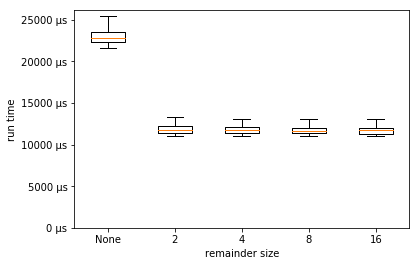

data_type: int, row_count: 10000000, chunk_size: 1000000, pruning_rate: 0.5, selectivity: 0.00033333300000000006, dictionary: 0, btree: 1, art: 0


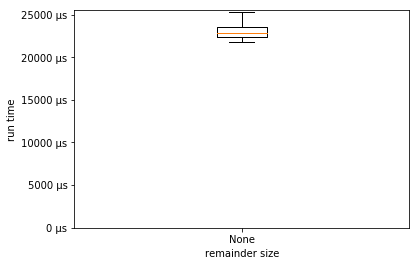

data_type: int, row_count: 10000000, chunk_size: 1000000, pruning_rate: 0.5, selectivity: 0.00033333300000000006, dictionary: 1, btree: 0, art: 0


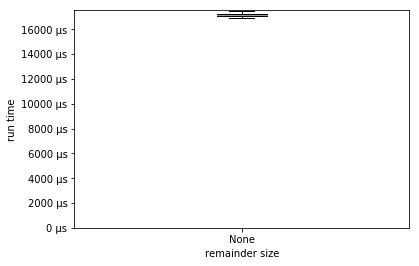

data_type: int, row_count: 10000000, chunk_size: 1000000, pruning_rate: 0.5, selectivity: 0.00033333300000000006, dictionary: 1, btree: 0, art: 1


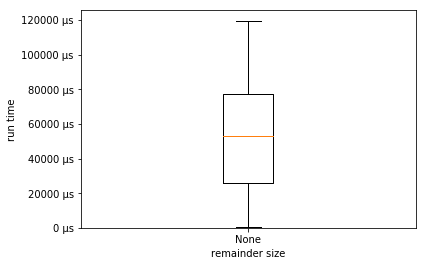

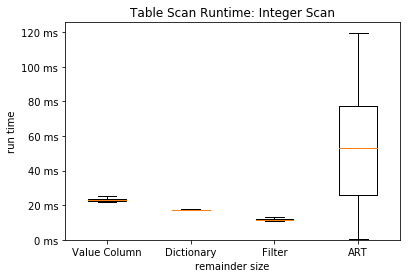

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt

table_info = json.load(open('benchmark_results.csv.json','r'))
#print(json.dumps(table_info, indent=2, sort_keys=False))
column_ids = dict()
for column_id in range(0, len(table_info["columns"])):
    column_info = table_info["columns"][column_id]
    column_ids[column_info["name"]] = column_id
    
data_type_column = column_ids["data_type"]    
row_count_column = column_ids["row_count"] 
chunk_size_column = column_ids["chunk_size"] 
pruning_rate_column = column_ids["pruning_rate"] 
selectivity_column = column_ids["selectivity"] 
remainder_size_column = column_ids["remainder_size"]
dictionary_column = column_ids["dictionary"]
btree_column = column_ids["btree"]
art_column = column_ids["art"]
run_time_column = column_ids["run_time"]

value_column_data = []
filter_data = []
dictionary_data = []
art_data = []

data = pd.read_csv('benchmark_results.csv', header=None)
grouped_data = data.groupby([data_type_column, row_count_column, chunk_size_column, pruning_rate_column,
                             selectivity_column, dictionary_column, btree_column, art_column])
for group_info in list(grouped_data.groups):
    data_type = group_info[0]
    row_count = group_info[1]
    chunk_size = group_info[2]
    pruning_rate = group_info[3]
    selectivity = group_info[4]
    dictionary = group_info[5]
    btree = group_info[6]
    art = group_info[7]
    print("data_type: "      + str(data_type) + 
          ", row_count: "    + str(row_count) + 
          ", chunk_size: "   + str(chunk_size) + 
          ", pruning_rate: " + str(pruning_rate) + 
          ", selectivity: "  + str(selectivity) +
          ", dictionary: "   + str(dictionary) + 
          ", btree: "        + str(btree) +
          ", art: "          + str(art))
    group = grouped_data.get_group(group_info)
    sub_groups = group.groupby([remainder_size_column])
    run_time_data = []
    for remainder_size in list(sub_groups.groups):
        sub_group = sub_groups.get_group(remainder_size)
        data = sub_group[run_time_column]
        run_time_data.append(data)
        if art == 1:
            art_data = data
        if dictionary == 1 and art == 0:
            dictionary_data = data
        if remainder_size == 4:
            filter_data = data
        if remainder_size == 0 and art == 0 and dictionary == 0 and btree == 0:
            value_column_data = data      
    show_boxplot(run_time_data)
big_plot(value_column_data, filter_data, dictionary_data, art_data)
